#Importing libraries

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to handle missing data
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# for handling categorical data
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import LabelEncoder 

# for seperating testing and training data
from sklearn.model_selection import train_test_split

# scaling the dataset
from sklearn.preprocessing import MinMaxScaler

# decision tree
from sklearn.tree import DecisionTreeClassifier

# for confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for Support Vector Machine
from sklearn.svm import SVC

# for Logistic Regression
from sklearn.linear_model import LogisticRegression

# for storing the trained model as a pickle file
import pickle

# to shuffle the input data
from sklearn.utils import shuffle



#Functions to imporve visualization

In [545]:
def resizePlot():
  plt.figure(figsize=(12,6))

In [546]:
def resizecolor():
  plt.figure(figsize=(15,7))

# Loading the dataset

In [547]:
df = pd.read_csv("/content/Book2.csv")

In [548]:
df.head()

,Humidity,Temperature,RainToday
0,75.4,25.2,No
1,26.2,78.6,No
2,69.6,25.7,No
3,77.5,25.4,No
4,61.8,27.3,No


# Handling Missing data

## Checking the existence of missing data

In [549]:
df.isnull().sum()

Humidity       0
Temperature    0
RainToday      0
dtype: int64

## Visualizing missing data

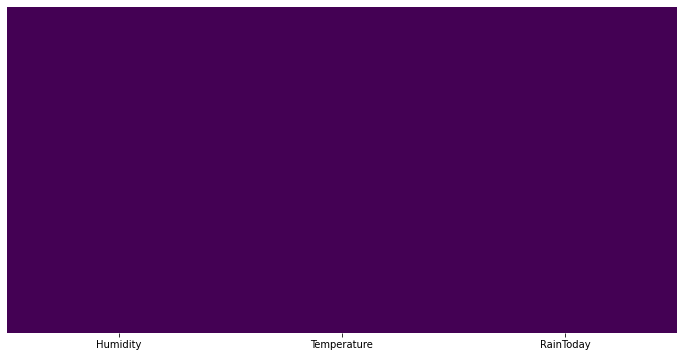

In [550]:
resizePlot()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Finding the correlation bw variables and their dependency and drawing conclusions

**Plotting same graph as above for Humidity & Temperature**

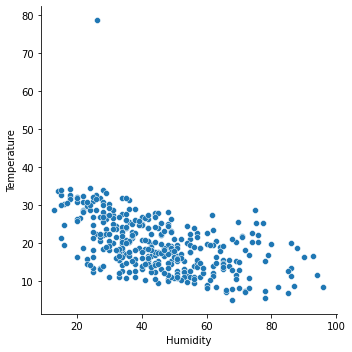

In [553]:
sns.relplot(x='Humidity', y='Temperature', data = df)

# Converting Categorical Data to Numeric Data

In [554]:
le = LabelEncoder()

In [555]:
df['RainToday'] = le.fit_transform(df['RainToday'])

In [556]:
df.head()

,Humidity,Temperature,RainToday
0,75.4,25.2,0
1,26.2,78.6,0
2,69.6,25.7,0
3,77.5,25.4,0
4,61.8,27.3,0


# Training and Testing of ml algo

**Splitting the input and output variables**

In [557]:
x = df.drop('RainToday',axis=1).values
y = df['RainToday'].values
x,y = shuffle(x, y)

**Seperating the training and testing data**

In [558]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

## Applying Algorithms

### Decision Tree

In [559]:
dtree = DecisionTreeClassifier()

In [560]:
dtree.fit(X_train,y_train)

# storing the trained model as a pickel file
with open("decisionTree.pkl","wb") as f:
  pickle.dump(dtree, f)


In [561]:
previsor_dtree = dtree.predict(X_test)

In [562]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       102
           1       0.28      0.33      0.30        21

    accuracy                           0.74       123
   macro avg       0.57      0.58      0.57       123
weighted avg       0.76      0.74      0.75       123

[[84 18]
 [14  7]]


Accuracy: 74.0 %


### Random Forest

In [563]:
rfc = RandomForestClassifier()

In [564]:
rfc.fit(X_train,y_train)
# storing the trained model as a pickel file
with open("randomForest.pkl","wb") as f:
  pickle.dump(rfc, f)

In [565]:
previsor_rfc = rfc.predict(X_test)

In [566]:
print(classification_report(y_test,previsor_rfc))
print(confusion_matrix(y_test,previsor_rfc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_rfc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.36      0.24      0.29        21

    accuracy                           0.80       123
   macro avg       0.61      0.57      0.58       123
weighted avg       0.77      0.80      0.78       123

[[93  9]
 [16  5]]


Acurácia: 79.7 %


### Support Vector Machine

In [567]:
svc = SVC()

In [568]:
svc.fit(X_train, y_train)
# storing the trained model as a pickel file
with open("svm.pkl","wb") as f:
  pickle.dump(svc, f)

In [569]:
previsor_svc = svc.predict(X_test)

In [570]:
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       102
           1       0.00      0.00      0.00        21

    accuracy                           0.83       123
   macro avg       0.41      0.50      0.45       123
weighted avg       0.69      0.83      0.75       123

[[102   0]
 [ 21   0]]


Accuracy: 82.89999999999999 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [571]:
LR = LogisticRegression()

In [572]:
LR.fit(X_train,y_train)
# storing the trained model as a pickel file
with open("logistic.pkl","wb") as f:
  pickle.dump(LR, f)

In [573]:
predict_LR = LR.predict(X_test)

In [574]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Accuracy:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       102
           1       0.38      0.14      0.21        21

    accuracy                           0.81       123
   macro avg       0.61      0.55      0.55       123
weighted avg       0.76      0.81      0.78       123

[[97  5]
 [18  3]]


Accuracy: 81.3 %


### Concluding the output from all algos

In [575]:
Accuracy_LR = np.round(accuracy_score(y_test,predict_LR),3) *100
Accuracy_svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
Accuracy_rfc = np.round(accuracy_score(y_test,previsor_rfc),3)*100
Accuracy_dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100

In [ ]:
print('Accuracy_Decision_tree: ',Accuracy_dtree,'%')
print('Accuracy_Random_Forest: ', Accuracy_rfc,'%')
print('Accuracy_LR: ', Accuracy_LR,'%')
print('Accuracy_SVC: ', Accuracy_svc,'%')

# We then had a better assessment of our Support Vector Machine with an 85.4% chance of not raining with this information

# Defining Functions to call the model and give the predicted value as output

## Decision Tree

Creating the function to open the pickle file and predict the output based upon the given inputs

In [577]:
def decisionTreePrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("decisionTree.pkl", "rb") as f:
    dTreeF = pickle.load(f);
    preds = dTreeF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomo"

## Random Forest

Creating the function to open the pickle file and predict the output based upon the given inputs

In [578]:
def randomForestPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("randomForest.pkl", "rb") as f:
    rfcF = pickle.load(f);
    preds = rfcF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"

## Support Vector Machine

Creating the function to open the pickle file and predict the output based upon the given inputs

In [579]:
def SVMPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("svm.pkl", "rb") as f:
    svmF = pickle.load(f);
    preds = svmF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"

## Logistic Regression

Creating the function to open the pickle file and predict the output based upon the given inputs

In [580]:
def LRPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("logistic.pkl", "rb") as f:
    LRF = pickle.load(f);
    preds = LRF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"